In [52]:
# importing data
import pandas as pd
import numpy as np
np.random_state = 42
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/1/sgemm_product_dataset/sgemm_product.csv')
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [53]:
# creating target variable (average of 4 runtime)
data['av_run'] = data[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis = 1).round(2)
print(data[['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)','av_run']].head())

   Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  av_run
0     115.26     115.87     118.55     115.80  116.37
1      78.13      78.25      79.25      79.19   78.70
2      79.84      80.69      80.76      80.97   80.56
3      84.32      89.90      86.75      85.58   86.64
4     115.13     121.98     122.73     114.81  118.66


In [54]:
# dropping 4 obselete run columns
data.drop(columns=['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], inplace = True)
data.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'av_run'],
      dtype='object')

In [55]:
# converting av_run into binary variable
import numpy as np
y_median = np.median(data['av_run'])
data['av_run_binary'] = [1 if i > y_median else 0 for i in data['av_run']]
print(data[['av_run','av_run_binary']].head())

   av_run  av_run_binary
0  116.37              1
1   78.70              1
2   80.56              1
3   86.64              1
4  118.66              1


In [56]:
# creating X and y varible from data
X = data.iloc[:,:-2]
y = data.iloc[:,-1]
print(X.shape)

(241600, 14)


In [6]:
# as almost all the attributes are categorical visualizing the effect of attributes on y variable
import matplotlib.pyplot as plt
import seaborn as sns
cols = X.columns

In [20]:
for i in cols:
    print('with ',i)
    print(pd.pivot_table(data = data, values = 'av_run', index = ['av_run_binary'], columns = [i], aggfunc = 'count'))

with  MWG
MWG              16     32     64     128
av_run_binary                            
0              12394  37235  45244  25935
1               6550  10029  30340  73873
with  NWG
NWG              16     32     64     128
av_run_binary                            
0               8556  31796  45676  34780
1              10388  15468  29908  65028
with  KWG
KWG               16     32
av_run_binary              
0              47698  73110
1              50254  70538
with  MDIMC
MDIMC             8      16     32
av_run_binary                     
0              52334  46876  21598
1              72594  38500   9698
with  NDIMC
NDIMC             8      16     32
av_run_binary                     
0              53558  47112  20138
1              71370  38264  11158
with  MDIMA
MDIMA             8      16     32
av_run_binary                     
0              41538  47241  32029
1              44158  45111  31523
with  NDIMB
NDIMB             8      16     32
av_run_binary      

In [57]:
# Creating train, validation and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)
print('traing data size:',X_train.shape, 'test data size:',X_test.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.3)
print('traing data size:',X_train.shape, 'val data size:',X_val.shape)

traing data size: (169120, 14) test data size: (72480, 14)
traing data size: (118384, 14) val data size: (50736, 14)


In [29]:
# usising decision tree classifier to seperate y with available features
from sklearn.tree import DecisionTreeClassifier

train_accu, val_accu = [],[]
# finalizing on max_depth to avoid overfitting
for i in range(2,20):
    model = DecisionTreeClassifier(max_depth = i, random_state = 42)
    model.fit(X_train,y_train)
    train_accu.append(model.score(X_train,y_train))
    val_accu.append(model.score(X_val,y_val))
    
print(train_accu, val_accu)

[0.6982278010541965, 0.7554652655764292, 0.7873868090282471, 0.8213863359913501, 0.8657250979862143, 0.8911085957561833, 0.9252094877686173, 0.9383362616569807, 0.9569705365589944, 0.967867279362076, 0.9751824570887958, 0.9831227192863901, 0.9890694688471415, 0.9931240708203811, 0.9961481281254223, 0.9979389106636032, 0.9991383970806865, 0.9997212461143398] [0.700212866603595, 0.7573123620309051, 0.7891043834752444, 0.8227294228949859, 0.8667218543046358, 0.8914971617786187, 0.9238804793440555, 0.9374408703878903, 0.9539774519079155, 0.9649558498896247, 0.9709279407127089, 0.9782994323557237, 0.9821428571428571, 0.9843897824030274, 0.9866958372753075, 0.9861242510249133, 0.9872674235257016, 0.9875630715862503]


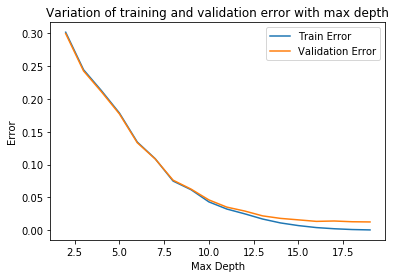

In [30]:
# plotting train and validation error with max_depth to finalize hyperparameter
plt.plot(range(2,20), [1-i for i in train_accu], label = 'Train Error')
plt.plot(range(2,20),[1-i for i in val_accu], label = 'Validation Error')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Variation of training and validation error with max depth')
plt.show()

In [8]:
# creating final tree with max_depth of 11 after analyzing above chart
from sklearn.tree import DecisionTreeClassifier
final_model = DecisionTreeClassifier(random_state = 42, max_depth = 11)
final_model.fit(X_train,y_train)

# predicting the accuracy of model with test data set
print('test accuracy:', final_model.score(X_test,y_test))

test accuracy: 0.9659216335540839


In [50]:
# understanding the importance of different features for classification
importance = final_model.feature_importances_
print(list(zip(cols, importance)))

[('MWG', 0.2948255602490387), ('NWG', 0.1799326519962453), ('KWG', 0.01534747150179245), ('MDIMC', 0.15910312441603225), ('NDIMC', 0.16096235941619177), ('MDIMA', 0.004160222513969963), ('NDIMB', 0.0026514692648930403), ('KWI', 0.0014599189294318671), ('VWM', 0.03352411739300607), ('VWN', 0.01764650414008327), ('STRM', 0.0459779965790127), ('STRN', 0.0036227736871267016), ('SA', 0.05517933696820502), ('SB', 0.025606492944970746)]


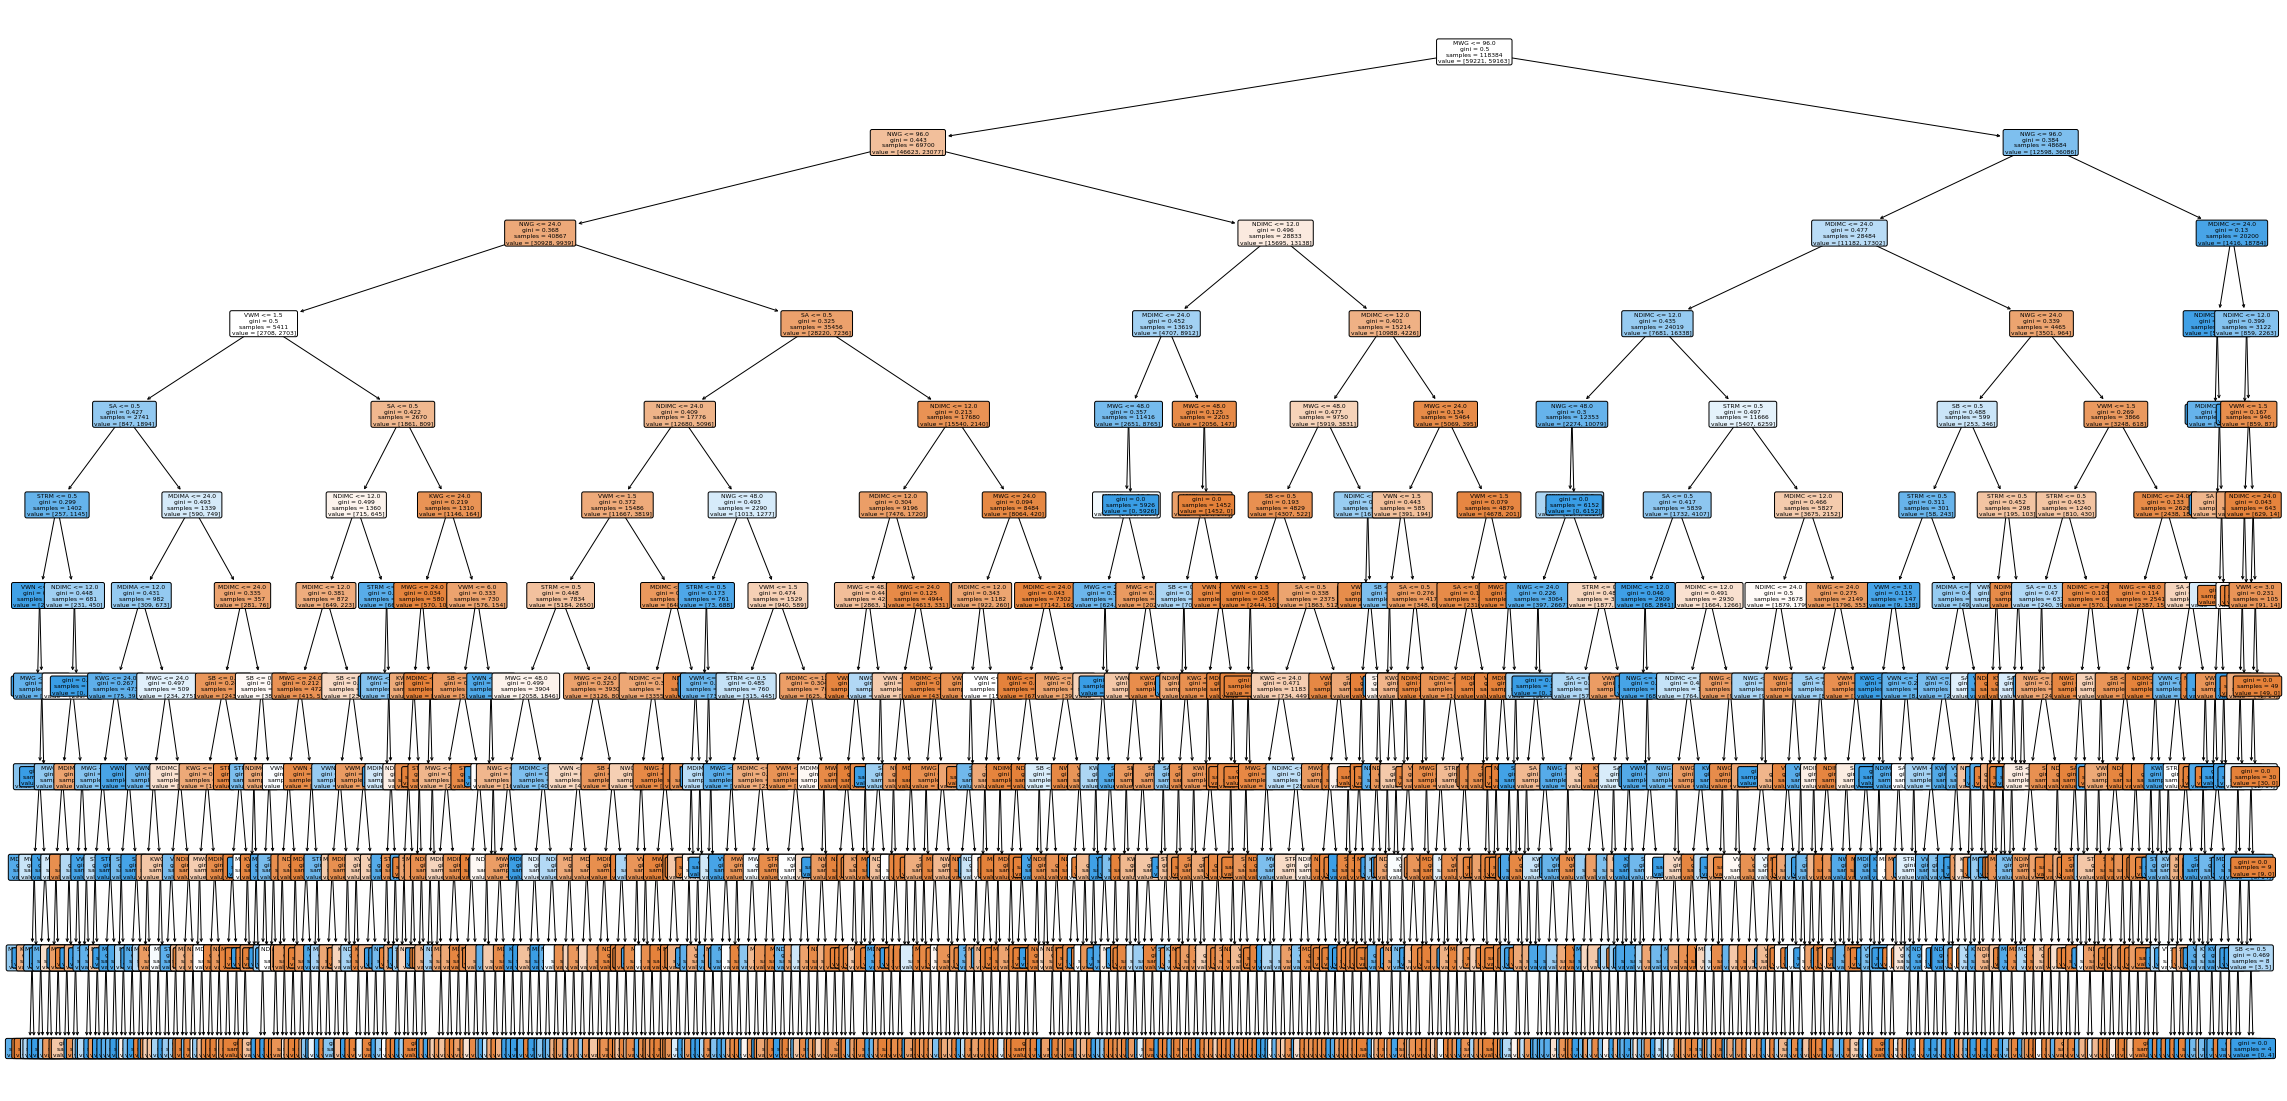

In [21]:
from sklearn import tree
plt.figure(figsize = (40,20))
_ = tree.plot_tree(final_model, feature_names = cols, filled = True, rounded = True, fontsize =6 )
plt.show()

In [27]:
plt.savefig('D:/MSBA/10 Applied Machine Learning/assignment/2/final_tree.png',orientation = 'landscape', papertype = 'a4')

<Figure size 432x288 with 0 Axes>

In [28]:
# visualizing final tree
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(final_model, feature_names = cols, filled = True, rounded = True, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('D:/MSBA/10 Applied Machine Learning/assignment/2/final_tree.png')

InvocationException: GraphViz's executables not found

In [54]:
# estimating optimal number of estimators for adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 42)
ada_train_accu, ada_val_accu = [],[]

for i in range(10,30):
    clf.set_params(n_estimators = i)
    clf.fit(X_train,y_train)
    ada_train_accu.append(clf.score(X_train,y_train))
    ada_val_accu.append(clf.score(X_val,y_val))
    
print("Training Set Score:",ada_train_accu)
print('Validation Set Score:', ada_val_accu)

Training Set Score: [0.7993225435869712, 0.8057169887822678, 0.7953270712258413, 0.7919735775104744, 0.8067475334504662, 0.7995337207730775, 0.7991198134883092, 0.7994661440735235, 0.7974472901743479, 0.7966448168671442, 0.7988495066900932, 0.7974726314366807, 0.7995759562102986, 0.7975908906609002, 0.7988917421273145, 0.8006825246654954, 0.7999138397080686, 0.8006402892282741, 0.8007923368022706, 0.8010035139883768]
Validation Set Score: [0.7992155471460107, 0.805424156417534, 0.7964167455061495, 0.792652160201829, 0.8061928413749606, 0.7999053926206244, 0.7988213497319457, 0.7990184484389783, 0.796535004730369, 0.7967518133081047, 0.7975993377483444, 0.7976190476190477, 0.7994520655944497, 0.7972248502049827, 0.7977175969725638, 0.7995703248186692, 0.7982103437401451, 0.798998738568275, 0.7996097445600757, 0.7996688741721855]


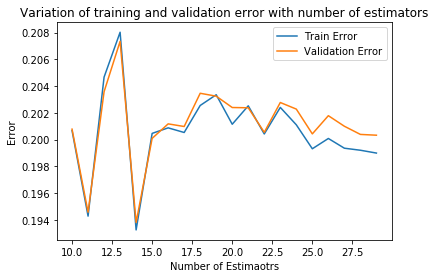

In [56]:
# plotting train and validation error with n_estimators to finalize hyperparameter
plt.plot(range(10,30), [1-i for i in ada_train_accu], label = 'Train Error')
plt.plot(range(10,30),[1-i for i in ada_val_accu], label = 'Validation Error')
plt.legend()
plt.xlabel('Number of Estimaotrs')
plt.ylabel('Error')
plt.title('Variation of training and validation error with number of estimators')
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), random_state = 42)

param_grid = {'base_estimator__max_depth': [10,15,20,25], 'n_estimators': [50,75,100,125,150]}

gscv_clf = GridSearchCV(estimator = ada_clf, param_grid = param_grid,scoring ='accuracy',cv = 3,return_train_score = True)

gscv_clf.fit(X_train,y_train)

print('Best Parameter: ',gscv_clf.best_params_, 'Best Score: ',gscv_clf.best_score_)

Best Parameter:  {'base_estimator__max_depth': 15, 'n_estimators': 150} Best Score:  0.9846178537640221


(4900, 14)

In [62]:
# estimating optimal number of estimators for adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 42, n_estimators = 40)
ada_train_accu, ada_val_accu = [],[]

for i in range(2,20):
    clf.set_params(base_estimator = DecisionTreeClassifier(max_depth = i))
    clf.fit(X_train,y_train)
    ada_train_accu.append(clf.score(X_train,y_train))
    ada_val_accu.append(clf.score(X_val,y_val))
    
print("Training Set Score:",ada_train_accu)
print('Validation Set Score:', ada_val_accu)

Training Set Score: [0.8850013515339911, 0.9323050412217867, 0.9645560210839302, 0.9783923503176105, 0.9860285173672118, 0.9929720232463847, 0.9990116907690229, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Set Score: [0.8854659413434248, 0.9319023967202775, 0.9634381898454746, 0.9765649637338379, 0.9817289498580889, 0.9854344055502996, 0.9880755282245348, 0.985789183222958, 0.9850402081362346, 0.9854935351624093, 0.9867155471460107, 0.9863804793440555, 0.9868732261116367, 0.9874448123620309, 0.9876813308104699, 0.9881937874487543, 0.9877010406811731, 0.9889427625354777]


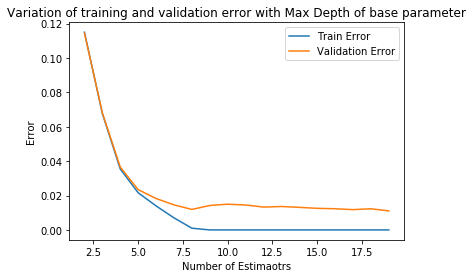

In [64]:
# plotting train and validation error with max_depth of base parameter
plt.plot(range(2,20), [1-i for i in ada_train_accu], label = 'Train Error')
plt.plot(range(2,20),[1-i for i in ada_val_accu], label = 'Validation Error')
plt.legend()
plt.xlabel('Number of Estimaotrs')
plt.ylabel('Error')
plt.title('Variation of training and validation error with Max Depth of base parameter')
plt.show()

In [65]:
# creating final adaboost model with base parameter's max_depth of 5
ada_final_clf = AdaBoostClassifier(random_state = 42, n_estimators = 40, base_estimator = DecisionTreeClassifier(max_depth = 5))
ada_final_clf.fit(X_train,y_train)

# getting the test accuracy of above model
print('Test accuracy of boosing model adaboost is ', ada_final_clf.score(X_test,y_test))

Test accuracy of boosing model adaboost is  0.9806567328918322


In [27]:
# sampling the data for SVMs as they take long time to train
# Checking distrubution of av_run_binary before sampling
print(data[['av_run_binary','SA']].groupby('av_run_binary').count())
# sampling 10K observations from pool of 140K observartions
data_sub = data.sample(n = 10000, random_state = 42)
print(data_sub[['av_run_binary','SA']].groupby('av_run_binary').count())

                   SA
av_run_binary        
0              120808
1              120792
                 SA
av_run_binary      
0              4964
1              5036


In [38]:
# using data_sub to train SVM model
from sklearn.svm import SVC
kernels = ['linear','rbf','sigmoid']

X = data_sub.iloc[:,:-2]
y = data_sub.iloc[:,-1]

for ker in kernels:
    svc_clf = SVC(random_state = 42, kernel = ker)
    svc_clf.fit(X,y)
    print("accuracy score of ",ker,"is : ",svc_clf.score(X_val, y_val))

accuracy score of  linear is :  0.82


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy score of  rbf is :  0.9471428571428572


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy score of  sigmoid is :  0.49666666666666665


In [39]:
from sklearn.svm import SVC
X = data_sub.iloc[:,:-2]
y = data_sub.iloc[:,-1]

svc_clf_final = SVC(kernel = 'rbf', random_state = 42)
svc_clf_final.fit(X,y)
print('Test accuracy of final SVC model is: ', svc_clf_final.score(X_test,y_test))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test accuracy of final SVC model is:  0.9493333333333334
